<a href="https://colab.research.google.com/github/geocarvalho/uni-proj/blob/master/IF699/cleber/3-aprendizado_baseado_em_instancias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado baseado em instâncias

* Problemas resolvidos no passado são representados como **instâncias** (exemplos de treinamento previamente etiquetados);

* Instâncias são **recuperadas** e **adaptadas** para resolver novos problemas;

* Generaliza informações com base em exemplos de treinamento:

> 1. Para inferir a classe de **novas instâncias** (ou instâncias de consulta);

> 2. Cada vez que uma instância é recebida, computa-se uma função objetivo com base no conhecimento oferecido pela base de **exemplos de treinamento**;

* Estima-se a classe da nova instância com base em **comportamentos locais**, sendo uma técnica **incremental**;

* *Lazy learning* ou aprendizado preguiçoso é o método de aprendizagem em que a generalização além dos dados de treinamento é adiada até que uma consulta seja feita ao sistema;

* *Eager Learning* ou aprendizado ansioso: o sistema tenta generalizar os dados de treinamento antes de receber uma consulta;

* Exemplos de algoritmos são: **k-vizinhos mais próximos**, **raciocínio baseado em casos**

## Algoritmo k-vizinhos mais próximos (*K-Nearest Neighbors - k-NN*)

* Todas as instâncias correspondem a **pontos** em um espaço **n-dimensional**;

* Vizinhança definida por uma função de **distância** ou por uma função de **similaridade**
> Menor distância = maior similaridade

* Classe de um novo exemplo é definida a partir dos **vizinhos mais próximos**;

* O atributo de saída é definido na forma:
> 1. **Discreta**: maior número de votos por exemplo;
> 2. **Contínua**: o atributo de saída é definido pela ponderação das saídas das **K** instâncias mais próximas;

$\hat{f}(x_q) = \frac{\sum^{k}_{i=1}f(x_i)}{k}$

> Onde $x_i$ é a instância descrita pelo vetor $<a_1(x_i),...,a_n(x_i)>$; $f(x_i)$ a classe de $x_i$

* Treinamento básico é armazenar exemplos de treinamento $<x_i,f(x_i)>$

* Dado o exemplo $x_q$ a ser classificado, seja $x1, ..., x_k$ as **k instâncias mais similares** a $x_q$. Retorne a classe **majoritária** das instâncias recuperadas.

$\hat{f}(x_q) \gets arg_{v \in V} max \sum^{k}_{i=1} \delta (v, f(x_i))$

> Onde $\delta (v, f(x_i)) = 1$ se $v == f(x_i)$ e $\delta (v, f(x_i)) = 0$, caso contrário.

* O algoritmo **k-NN** usa comumente a **Distância Euclidiana** para definição de vizinhança;

$d(x_i, x_j) = \sqrt{\sum^{n}_{r=1}(a_r(x_i) - a_r(x_j))^2}$

* Atributos de maior **escala numérica** podem dominar função de distância;

> Usualmente,  os atributos são normalizados para intervalo entre 0 e 1.

$a_{NORM}(x) = \frac{a(x) - min_i(a(x_i))}{max_ia(x_i) - min_i(a(x_i))}$

$a_{NORM}(x) = \frac{a(x) - min_i(a(x_i))}{std_i(a(x_i))}$

* Uma boa prática é incluir a normalização dos dados implicitamente no cálculo da distância;

$d(x_i, x_j) = \sqrt{\sum^{n}_{r=1}\frac{(a_r(x_i) - a_r(x_j))^2}{(max_i a_r(x_i) - min_i a_r(x_j))^2}}$

$d(x_i, x_j) = \sqrt{\sum^{n}_{r=1}\frac{(a_r(x_i) - a_r(x_j))^2}{(std_i(a_r(x_i)))^2}}$

* Distância de Hamming para **atributos categóricos**:
> Soma 1 para cada atributo cujo valor não coincide nas instâncias.

$d_{HAMMING}(x_i, x_j) = \sum^{n}_{r=1} dist(a_r(x_i), a_r(x_j))$

$dist(a_r(x_i), a_r(x_j)) = \begin{cases} 
0, & \quad \text{se } a_r(x_i) == a_r(x_j) \\
1, & \quad \text{caso contrário}
\end{cases}$

* Função de distância considerando **missing values** (Witten, Frank (200, p.115)):

> Para atributos categóricos, distância é igual a 1 na presença de missing values;

> Para atributos numéricos: i) se os dois valores comparados são *missing values* então distância igual a 1; ii) se apenas um dos valores é *missing value*, então a distância é o maior dentre os seguintes valores: a) tamanho normalizado do atributo presente; b) um menos o tamanho normalizado do atributo presente.

* Outras funções de distância:

> 1. Distância L1 normalizada

$d(x_i, x_j) = \sum^{n}_{r=1} \frac{|a_r(x_i) - a_r(x_j)|}{max_i a_r(x_i) - min_i a_r(x_j)}$

> 2. Distância Cosseno normalizada

$d(x_i, x_j) = \frac{\sum^{n}_{r=1}a_r(x_i) \times a_r(x_j)}{\sum^{n}_{r=1}a_r(x_i)^2 \times \sum^{n}_{r=1}a_r(x_j)^2}$

* Exemplos de espaço de instâncias variando o **k**:

![k_1](https://github.com/geocarvalho/uni-proj/blob/master/IF699/cleber/k_1.png?raw=true)

![k_3](https://github.com/geocarvalho/uni-proj/blob/master/IF699/cleber/k_3.png?raw=true)

![k_5](https://github.com/geocarvalho/uni-proj/blob/master/IF699/cleber/k_5.png?raw=true)

* O dilema da escolha do parâmetro **k**: 

> 1. O algoritmos se torna mais flexível; 
> 2. Valores muito baixos podem aumentar a contribuição de **exemplos ruidosos**.
> 3. **Menor gasto computacional**;
> 4. Valores muito altos podem aumentar a contribuição de exemplos **pouco similares** (menos relevantes);
> 5. **Mais robusto a ruído**;
> 6. **Menor flexibilidade**;

* O que fazer em caso de **empate** entre duas ou mais classes?

> 1. Considerar apenas os *k-1 vizinhos mais próximos**;
> 2. Em caso de novo empate, repetir o processo;
> 3. Esse processo para quando uma classe for unânime.

![k_4_3](https://github.com/geocarvalho/uni-proj/blob/master/IF699/cleber/k_4_3.png?raw=true)

* O valor do parâmetro **k** é comumente escolhido via **tentativa e erro** (avaliação empírica com diferentes valores de **k**, validação cruzada);

## Algoritmo k-NN com ponderação pela distância

* A contribuição de cada vizinho pode ser ponderada pela distância com a instância a ser classificada;

$\hat{f}(x_q) \gets arg_{v \in V} max \sum^{k}_{i=1}w_i \times \delta(v, f(x_i))$

$w_i = \frac{1}{d(x_q,x_i)^2}$
$w_i = \frac{1}{d(x_q, x_i)}$
$w_i = 1 - d(x_q, x_i)$

* Com ponderação a escolha adequada de k se tornaria menos importante?
> Note que instâncias muito distantes teriam pouca contribuição na predição.

* "There is no harm in allowing all training examples to have a influence on the classification ..." - T. Michell (1997, p.234)

* Método de *Shepard*: k-NN ponderado usando todos os exemplos de treinamento como vizinhos;

## Algoritmo k-NN - Discussão

* Se somente os **k** mais próximos forem considerados, o algoritmo é denominado **local**. Mas se todas as instâncias de treinamento forem consideradas, é denominado **global**;

* Computam a saída em função dos atributos de entrada;

* Se os atributos de entrada não forem bem definidos o resultado pode ser ruim:
> Instâncias são representadas por 10 atributos de entrada e 1 de saída. Porém, somente 2 atributos de entrada são relevantes. Os 8 outros podem influenciar a saída, mas não deveriam existir na base de aprendizado.

* Uma abordagem para resolver o problema é dar peso a cada atributo, assim os mais relevantes serão mais considerados. Outra é remover os atributos menos significativos.

## Algoritmo k-NN para Regressão

* O algoritmo pode ser usado para estimar valores de funções contínuas

$\hat{f}(x_q) \gets \frac{\sum^{k}_{i=1}f(x_i)}{k}$

> Predição é a **média simples** dos valores alvo armazenados nas instâncias recuperadas.

* Regressão com ponderação pela distância

$\hat{f}(x_q) \gets \frac{\sum^{k}_{i=1}w_if(x_i)}{\sum^{k}_{i=1}w_i}$

> Predição é a **média ponderada** dos valores alvo armazenados nas instâncias recuperadas.

* Vantagens:
> 1. Fácil de implementar;
> 2. Não requer uma etapa de treinamento;
> 3. Ideal para conjuntos de dados pequenos ou médios. Algoritmos como árvore de decisão precisam de mais dados para gerar um bom modelo;
> 4. Usa informação local, podendo ser implementado com comportamentos adaptativos;
> 5. Pode ser paralelizado.

* Desvantagens:
> 1. É muito sensível a presença de atributos irrelevantes e/ou redundantes (*curse of dimensionality*);
> 2. Custo computacional e armazenamento em alguns contextos é impraticável. Reduzir o número de exemplos de treinamento pode amenizar esse problema. **Algoritmos baseados em protótipos** também podem ajudar.

## Exemplo

* [Exemplo interativo de k-NN demo](http://vision.stanford.edu/teaching/cs231n-demos/knn/)

## Vantagens (geral)

* São algoritmos de aprendizado supervisionado nos quais instâncias são usadas (incrementalmente) para classificar objetos;

* Custo de atualização das instâncias é baixo;

* Custo ou velocidade do aprendizado (treinamento) é baixo;

* É possível adaptar os algoritmos para obter descrição dos conceitos;

## Desvantagens (geral)

* São computacionalmente custosos, desde que considerem todas as instâncias;

* Não tratam bem atributos ruidosos (sensíveis);

* Não são robustos a atributos irrelevantes (sensíveis);

* O desempenho depende muito da escolha da função de similaridade para computar as distâncias;

* Não existe forma simples de tratar atributos nominais e faltantes;

* Não fornecem uma boa descrição da estrutura dos dados.

## Referências

* [Aula original - Cleber]()
* T. Mitchell, 1997. Machine Learning.
* I. Witten, E. Frank, 2000. Data Mining – Practical Machine Learning Tools and Techniques with Java Implementations.
* D. Aha, D. Kibler, M. Albert, ,1991. Instance-based learning algorithms. Machine Learning, 6:37--66.


In [0]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

altura = [1.87, 1.65, 1.8, 1.81, 1.9, 1.74, 1.49, 1.56, 1.73, 1.76]
peso = [76.1, 75.2, 60., 55.9, 93.3, 65.2, 45.1, 53.2, 55.1, 63.1]
sexo = [0, 1, 1, 0, 1, 1, 0, 0, 0, 1]

df_train = pd.DataFrame(list(zip(altura, peso, sexo)), columns=['altura', 'peso', 'sexo'])
df_train

,altura,peso,sexo
0,1.87,76.1,0
1,1.65,75.2,1
2,1.80,60.0,1
3,1.81,55.9,0
4,1.90,93.3,1
5,1.74,65.2,1
6,1.49,45.1,0
7,1.56,53.2,0
8,1.73,55.1,0
9,1.76,63.1,1


In [0]:
# Dados para predizer o sexo:
alt_pred = 1.75
peso_pred = 52.

# Primeiro passo é normalizar os valores
std_alt = df_train.altura.std()
mean_alt = df_train.altura.mean()
std_peso = df_train.peso.std()
mean_peso = df_train.peso.mean()
df_train['altura'] = df_train['altura'].apply(lambda x: (x - mean_alt) / std_alt)
df_train['peso'] = df_train['peso'].apply(lambda x: (x - mean_peso) / std_peso)

# Também normalizar os dados de entrada
alt_pred = (alt_pred - mean_alt) / std_alt
peso_pred = (peso_pred - mean_peso) / std_peso

print(df_train)
print(alt_pred, peso_pred)

     altura      peso  sexo
0  1.063686  0.847905     0
1 -0.619846  0.783669     1
2  0.528017 -0.301192     1
3  0.604541 -0.593819     0
4  1.293258  2.075510     1
5  0.068872  0.069945     1
6 -1.844232 -1.364641     0
7 -1.308563 -0.786524     0
8 -0.007652 -0.650917     0
9  0.221920 -0.079937     1
0.14539586327131715 -0.8721711464529893


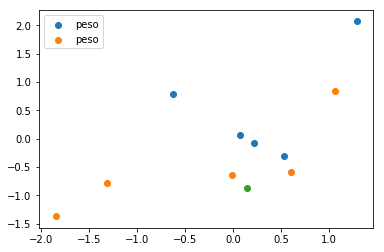

In [0]:
df_train_1 = df_train.query('sexo == 1')
df_train_0 = df_train.query('sexo == 0')
plt.scatter(df_train_1['altura'], df_train_1['peso'])
plt.scatter(df_train_0['altura'], df_train_0['peso'])
plt.scatter(alt_pred, peso_pred)
plt.legend()
plt.show()

In [0]:
# Calcular a distância da amostra desconhecida para as conhecidas
def euclidean_distance(x1, x2):
  ''' Calcula a distancia Euclidiana'''
  return np.sqrt(np.sum((x1 - x2)**2))

def knn(x_pred, x_train, k, y_train):
  ''' Retorna a classe do novo dado '''
  # calcular a distância
  distances = [euclidean_distance(x_pred, x) for x in x_train]
  # pega os k vizinhos mais proximos
  k_indices = np.argsort(distances)[:k]
  k_nearest_labels = [y_train[i] for i in k_indices]
  # retorna a classe com maior quantidade de votos
  most_common = Counter(k_nearest_labels).most_common(1)
  
  return most_common[0][0]

# Organiza as colunas em arrays
x_pred = np.array([alt_pred, peso_pred])
x_train = df_train[['altura', 'peso']].values
y_train = df_train['sexo'].values

# Classificação 
k = 3
pred_3 = knn(x_pred, x_train, k, y_train)
print("Para k=3 a classe é: ",pred_3)

# Classificação 
k = 5
pred_5 = knn(x_pred, x_train, k, y_train)
print("Para k=5 a classe é: ", pred_5)

Para k=3 a classe é:  0
Para k=5 a classe é:  1


## [KNN (K Nearest Neighbors) in Python - Machine Learning From Scratch 01 - Python Tutorial](https://www.youtube.com/watch?v=ngLyX54e1LU)



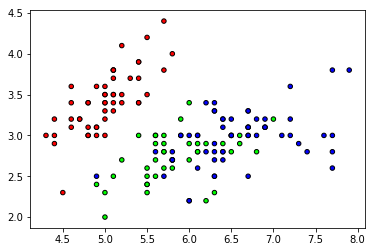

In [0]:
# Iris dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [0]:
def euclidean_distance(x1, x2):
  ''' Calcula a distancia euclidiana '''
  return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
  def __init__(self, k=3):
    self.k = k
    
  def fit(self, X, y):
    self.X_train = X
    self.y_train = y
  
  def predict(self, X):
    predicted_labels = [self._predict(x) for x in X]
    return np.array(predicted_labels)
    
  def _predict(self, x):
    # calcular as distancias
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
    # pegar os k vizinhos, suas classes
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    
    # pegar a classe majoritaria
    common = Counter(k_nearest_labels).most_common(1)
    return common[0][0]

In [0]:
    
# Testar o exemplo
clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# Calcular a acuracia, quantas predições foram corretamente classificadas
acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

0.9666666666666667


## [Classification w/ K Nearest Neighbors Intro - Practical Machine Learning Tutorial with Python p.13](https://www.youtube.com/watch?v=44jq6ano5n0&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=13)

## [K Nearest Neighbors Application - Practical Machine Learning Tutorial with Python p.14](https://www.youtube.com/watch?v=1i0zu9jHN6U&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=14)

In [0]:
# Breast cancer dataset

data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(data, names=[
    'id', 'clump_thinckness', 'unif_cell_size', 'unif_cell_shape', 
    'marg_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland_chrom',
    'norm_nucleoli', 'mitosis', 'class'])
df

,id,clump_thinckness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [0]:
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

# Substituir ? por -99999 (a maioria dos algoritmos reconhecem como um outlier)
df.replace('?', -99999, inplace=True)

# Remover colunas desnecessárias
df.drop(['id'], 1, inplace=True)

# Definir x e y
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

# Fazer o cross validation, misturar os dados e sera-los garantindo representação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Definir o classificador
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

# Calcular acuracia
acc = clf.score(X_test, y_test)
print(acc)

0.9642857142857143


In [0]:
# Exemplo de predição

example_measures = np.array([4,2,1,1,1,2,3,2,1])
example_measures = example_measures.reshape(1, -1)
prediction = clf.predict(example_measures)
print(prediction)

[2]


In [0]:
# Para duas amostras
example_measures = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,2,2,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

[2 2]


## [Euclidean Distance - Practical Machine Learning Tutorial with Python p.15](https://www.youtube.com/watch?v=hl3bQySs8sM&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=15)

In [0]:
from math import sqrt

plot1 = [1, 3]
plot2 = [2, 5]

euclidean_distance = sqrt((plot1[0] - plot2[0])**2 + (plot1[1] - plot2[1])**2)
print(euclidean_distance)

2.23606797749979


## [Creating Our K Nearest Neighbors Algorithm - Practical Machine Learning with Python p.16](https://www.youtube.com/watch?v=n3RqsMz3-0A&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=16)

## [Writing our own K Nearest Neighbors in Code - Practical Machine Learning Tutorial with Python p.17](https://www.youtube.com/watch?v=GWHG3cS2PKc&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=17)

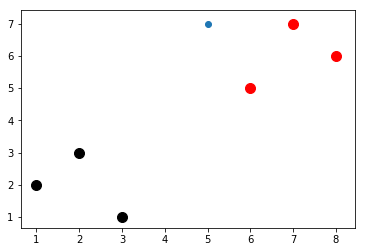

In [0]:
dataset = {'k': [[1,2], [2,3], [3,1]], 'r':[[6,5], [7,7], [8,6]]}
new_features = [5,7]

[[plt.scatter(ii[0], ii[1], s=100, c=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1])
plt.show()

In [0]:
import warnings

def k_nearest_neighbors(data, predict, k=3):
  ''' Algoritm for k-NN'''
  if len(data) >= k:
    warnings.warn('K is set to a value less than total voting groups!')
  distances =[]
  for group in data:
    for features in data[group]:
      #euclidean_distance = np.sqrt(np.sum((np.array(features) - np.array(predict))**2))
      euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
      distances.append([euclidean_distance, group])
  votes = [i[1] for i in sorted(distances)[:k]]
  vote_result = Counter(votes).most_common(1)[0][0]
  return vote_result

result = k_nearest_neighbors(dataset, new_features, k=3)
print(result)

r


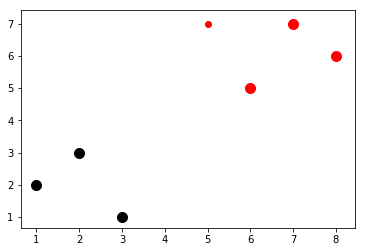

In [0]:
[[plt.scatter(ii[0], ii[1], s=100, c=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], color=result)
plt.show()

## [Applying our K Nearest Neighbors Algorithm - Practical Machine Learning Tutorial with Python p.18](https://www.youtube.com/watch?v=3XPhmnf96s0&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=18)

## [Final thoughts on K Nearest Neighbors - Practical Machine Learning Tutorial with Python p.19](https://www.youtube.com/watch?v=r_D5TTV9-2c&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=19)

